In [1]:
# Importing Libraries

import pandas as pd

import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
import posixpath
import glob
import random

from PIL import Image
from PIL.Image import Resampling

from tensorflow import keras
from keras import layers

import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.initializers import Zeros, GlorotNormal

In [2]:
# Initializing and declaring path of images

test_dir = "Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test"
train_dir = "Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train"
val_dir = "Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val"

In [3]:
# Setting Variables

img_height, img_width = 250, 250
classifiers = ['fractured', 'not fractured']

In [4]:
def import_data(dataset, data):
    X = []
    y = []
    for i in range(2):
        path = os.path.normpath(os.path.join(data, classifiers[i]))
        path = path.replace("\\", "/")

        for img in os.listdir(path):
            try:
                loaded_img = load_img(os.path.join(path, img), color_mode="grayscale")
                loaded_img = loaded_img.resize((img_width, img_height), resample = Resampling.BICUBIC)
                img_arr = img_to_array(loaded_img)
                img_arr = img_arr.reshape(img_width, img_height, 1).astype("float32")
                X.append(img_arr)
                y.append(i)
                dataset.append([loaded_img, classifiers[i]])
            except:
                pass
    
    random.shuffle(dataset)

    return np.array(X), np.array(y)

In [5]:
train_df = []
X_train, y_train = import_data(train_df, train_dir)
X_valid, y_valid = import_data([], val_dir)
X_test, y_test = import_data([], test_dir)

c:\Users\mabel\miniconda3\envs\myenv\lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


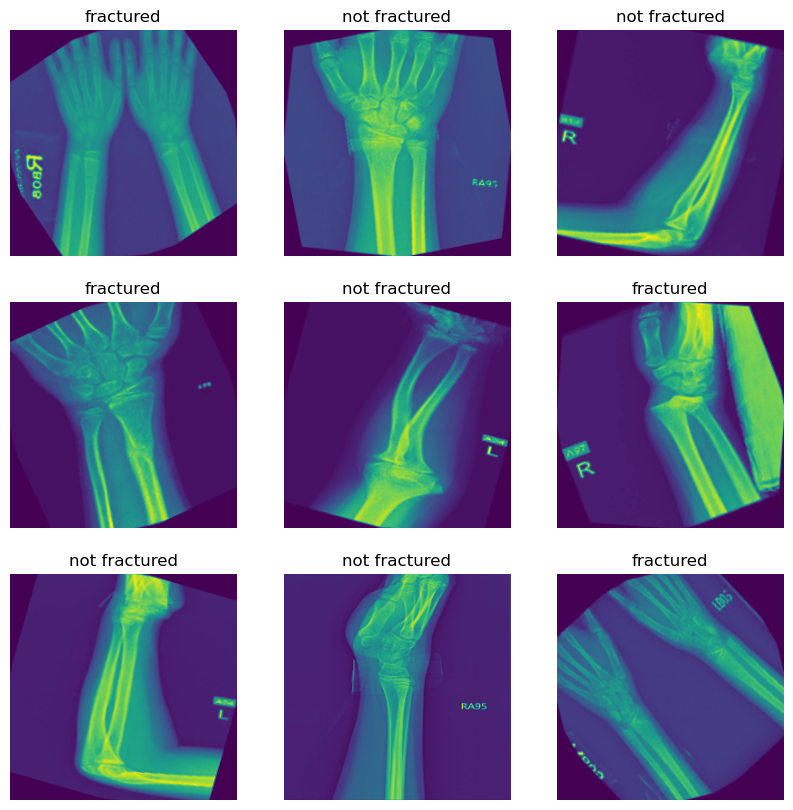

In [6]:
train_df = pd.DataFrame(train_df,columns=['image','label'])

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(train_df.image[i])
    plt.title(train_df.label[i])
    plt.axis("off")

# plt.tight_layout()
# plt.show()

In [7]:
model = Sequential([
    #Normalize the value
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  # First Convolutional Layer
  layers.Conv2D(32, kernel_size=(3, 3), strides=(3, 3), activation='relu', input_shape=(250, 250, 1),
                 kernel_initializer=GlorotNormal(), bias_initializer=Zeros()),
  layers.BatchNormalization(),
  layers.Dropout(0.2),
  # Second Convolutional Layer
  layers.Conv2D(16, kernel_size=(3, 3), strides=(3, 3), activation='relu', 
                 kernel_initializer=GlorotNormal(), bias_initializer=Zeros()),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Dropout(0.2),

  # 
  layers.Flatten(),
  layers.BatchNormalization(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 250, 250, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 83, 83, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 83, 83, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 83, 83, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 16)        4624      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                      

In [8]:
model.compile(optimizer=Adam(learning_rate=0.00002), loss= 'binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_valid, y_valid))


Epoch 1/20
289/289 [==============================] - 33s 107ms/step - loss: 0.6225 - accuracy: 0.6701 - val_loss: 0.6681 - val_accuracy: 0.5942
Epoch 2/20
289/289 [==============================] - 32s 112ms/step - loss: 0.5026 - accuracy: 0.7584 - val_loss: 0.4926 - val_accuracy: 0.7412
Epoch 3/20
289/289 [==============================] - 27s 95ms/step - loss: 0.4348 - accuracy: 0.7969 - val_loss: 0.4098 - val_accuracy: 0.7776
Epoch 4/20
289/289 [==============================] - 26s 91ms/step - loss: 0.3981 - accuracy: 0.8215 - val_loss: 0.3836 - val_accuracy: 0.7983
Epoch 5/20
289/289 [==============================] - 28s 98ms/step - loss: 0.3629 - accuracy: 0.8451 - val_loss: 0.3686 - val_accuracy: 0.8214
Epoch 6/20
289/289 [==============================] - 28s 98ms/step - loss: 0.3304 - accuracy: 0.8635 - val_loss: 0.3561 - val_accuracy: 0.8372
Epoch 7/20
289/289 [==============================] - 32s 110ms/step - loss: 0.3024 - accuracy: 0.8772 - val_loss: 0.3384 - val_accura

c:\Users\mabel\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mabel\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mabel\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mabel\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

<Axes: title={'center': 'Accuracy of Validation vs. Train by Epoch'}, xlabel='Epochs', ylabel='Accuracy'>

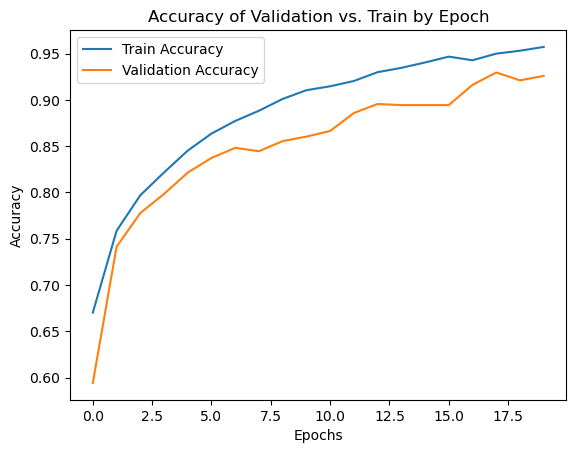

In [9]:
hist_acc = model.history.history['accuracy']
hist_val_acc = model.history.history['val_accuracy']
hist_loss = model.history.history['loss']
hist_val_loss = model.history.history['val_loss']

pd.option_context('mode.use_inf_as_na', True)

plt.title('Accuracy of Validation vs. Train by Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
sns.lineplot(data = hist_acc, label = 'Train Accuracy')
sns.lineplot(data = hist_val_acc, label = 'Validation Accuracy')

c:\Users\mabel\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mabel\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mabel\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mabel\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

<Axes: title={'center': 'Loss of Validation vs. Train by Epoch'}, xlabel='Epochs', ylabel='Loss'>

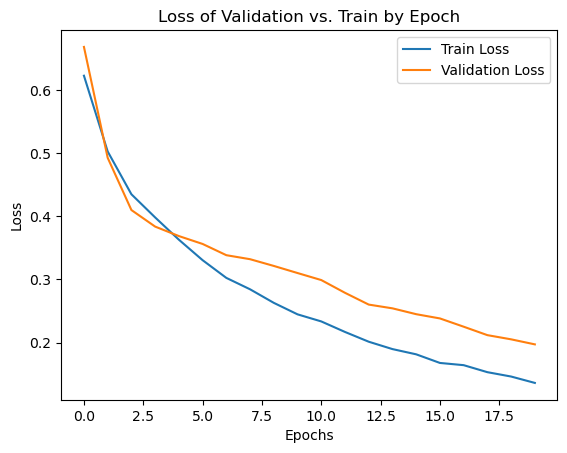

In [10]:
plt.title('Loss of Validation vs. Train by Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
sns.lineplot(data = hist_loss, label = 'Train Loss')
sns.lineplot(data = hist_val_loss, label = 'Validation Loss')

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

y_pred = np.round(model.predict(X_test))
print(f'Accuracy Score : {accuracy_score(y_test,y_pred)}')
print(f'Precision Score : {precision_score(y_test,y_pred, average="weighted")}')
print(f'Recall Score : {recall_score(y_test,y_pred, average="weighted")}')
print(f'F1 Score : {f1_score(y_test,y_pred, average="weighted")}')

16/16 [==============================] - 1s 28ms/step
Accuracy Score : 0.888
Precision Score : 0.8892610020092034
Recall Score : 0.888
F1 Score : 0.8877114331723027


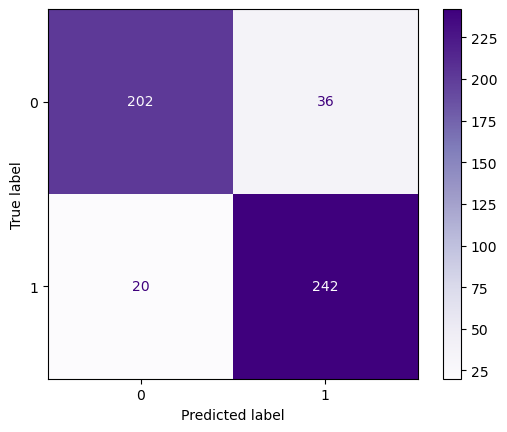

In [12]:
cm = confusion_matrix(np.array(y_test), np.array(y_pred))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot(cmap=plt.cm.Purples)
plt.show()